# Corona Prediction Model

In [148]:
import numpy as np
import matplotlib.pyplot as plt

$$ \frac{dn}{dt} = k \bigg(A-n\bigg)\bigg(n - n(t-a)\bigg) $$

In [149]:
n_m = [15, 15, 15, 15, 15, 15, 35, 35, 35, 53, 57, 60, 60, 63, 68, 75, 100, 124, 158, 221, 319, 435,\
       541, 704, 994, 1301, 1697, 2247, 2943, 3680, 4663, 6456]
n_m = n_m[18:]

In [150]:
A = 327.2*10**6
a = 12
k = 10**(-9)
dt = 0.01

def chi_sqr(a,k):
    t = 0
    n = [n_m[0]]
    dndt = [0.01]
    time_steps = int(len(n_m)/dt)+1
    for trial in range(time_steps):
        t += dt
        if len(n) < a/dt:
            n_0 = 0
        else:
            n_0 = n[-int(a/dt)]
        n += [n[-1]+dndt[-1]*dt]
        dndt += [k*(A-n[-1])*(n[-1]-n_0)]
    error = 0
    for j in range(len(n_m)):
        error += (n_m[j]-n[int(j/dt)])**2
    return error

def get_func(a,k):
    t = 0
    n = [n_m[0]]
    dndt = [0.01]
    time_steps = int((len(n_m)+1)/dt)+1
    for trial in range(time_steps):
        t += dt
        if len(n) < a/dt:
            n_0 = 0
        else:
            n_0 = n[-int(a/dt)]
        n += [n[-1]+dndt[-1]*dt]
        dndt += [k*(A-n[-1])*(n[-1]-n_0)]
    func = []
    for j in range(len(n_m)+1):
        func += [n[int(j/dt)]]
    return func

def grad_descent(a,k,step):
    d = chi_sqr(a,k)
    a_list = []
    k_list = []
    for n in range(10**5):
        a_1 = a*(2*np.random.random())
        k_1 = k*(2*np.random.random())
        d_1 = chi_sqr(a_1,k_1)
        a_2 = a_1 - d*(a_1-a)/(d_1-d)*step
        k_2 = k_1 - d*(k_1-k)/(d_1-d)*step
        if d_1<d:
            k = k_1
            k_1 = k_2
            a = a_1
            a_1 = a_2
            d = d_1
        a_list += [a]
        k_list += [k]
    plt.plot(a_list)
    plt.show()
    plt.plot(k_list)
    plt.show()
    return [a,k,d]

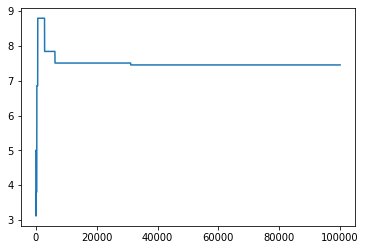

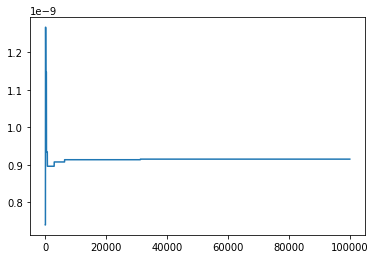

In [151]:
params = grad_descent(5,7.4*10**(-10),0.1)

In [152]:
n_c = get_func(params[0], params[1])

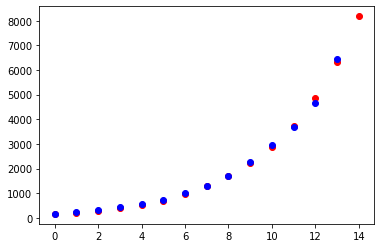

In [153]:
t_0 = list(range(len(n_c)))
t_1 = list(range(len(n_m)))
plt.plot(t_0,n_c,'ro',t_1,n_m,'bo')

In [154]:
n_c[-1]

8181.654825100881

In [155]:
params[0]

7.454244719848432